# PyTao plotting with Matplotlib

PyTao supports plotting directly from the notebook, without a separate (X11) plot window.

PyTao provides two backends:
* Bokeh (with interactive plotting support)
* Matplotlib 

When plotting is enabled, PyTao will automatically select the best available backend.


The plotting backend may be specified explicitly, as we will do in this notebook in order to show off
this backend's functionality.

---
## Tao setup

In [1]:
%config InlineBackend.figure_format = "retina"   # Higher resolution plots, if available on your platform.

In [2]:
import pytao
from pytao import Tao

import matplotlib.pyplot as plt

In [3]:
init_file = "$ACC_ROOT_DIR/bmad-doc/tao_examples/optics_matching/tao.init"

tao = Tao(init_file=init_file, plot="mpl")

## The floor plan

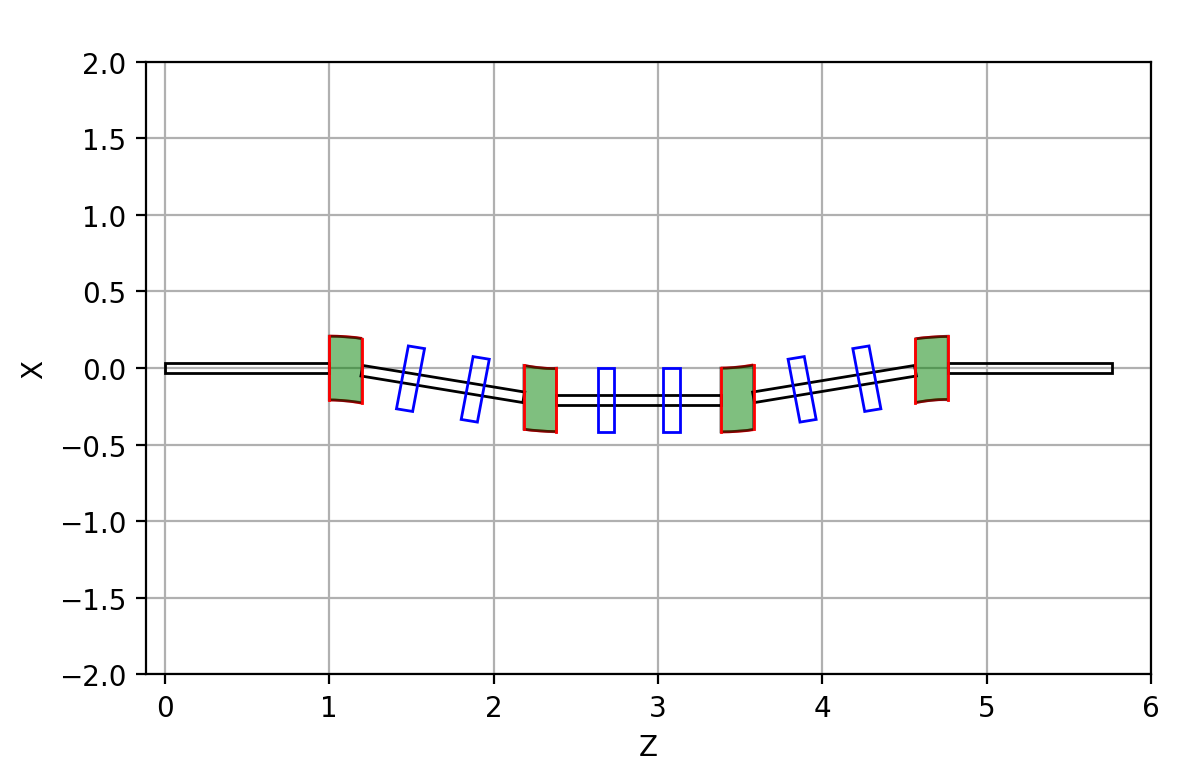

In [4]:
tao.plot("floor_plan", ylim=(-2, 2), figsize=(6, 4))

## Single data plots

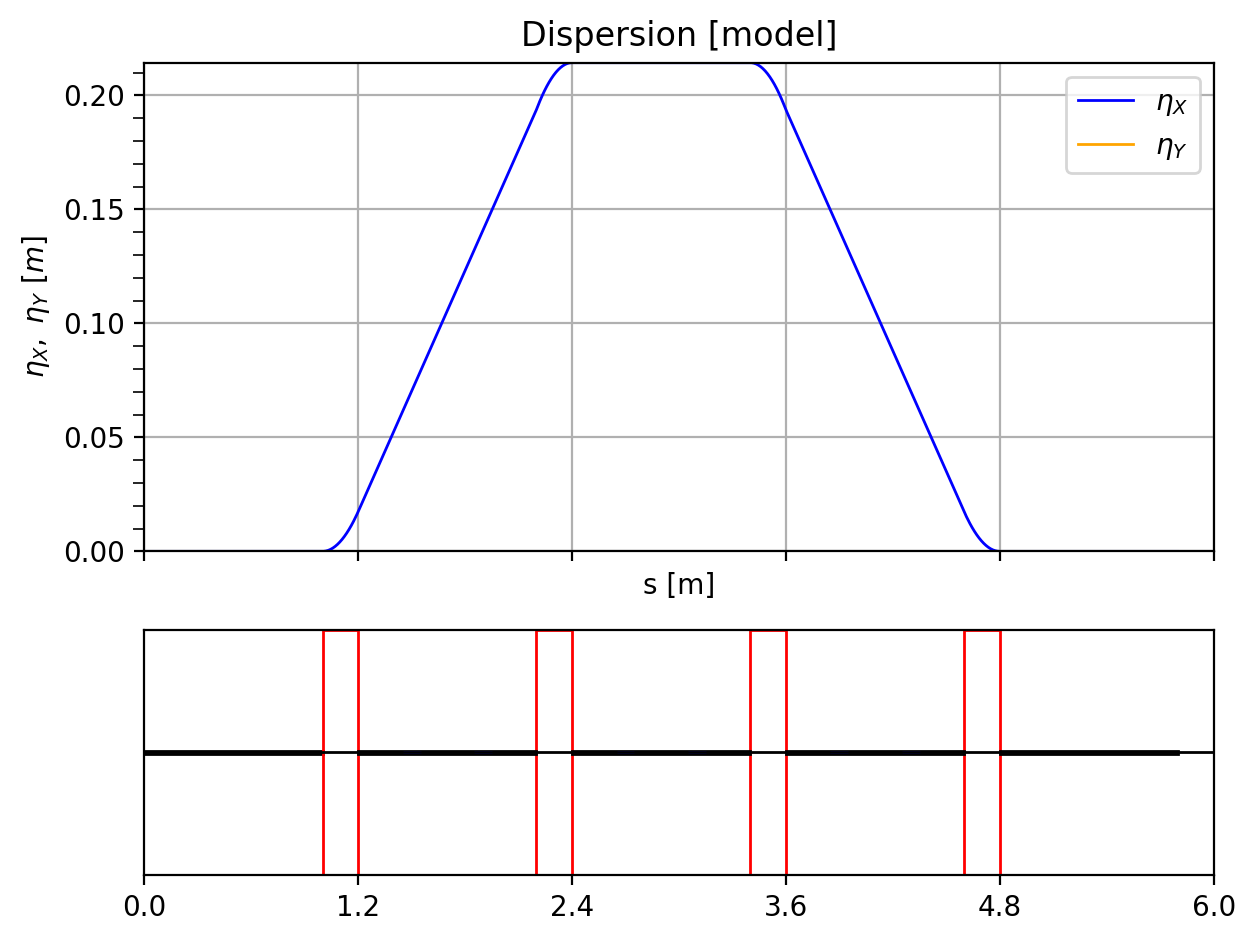

In [5]:
tao.plot("dispersion", include_layout=True)

## Plot fields

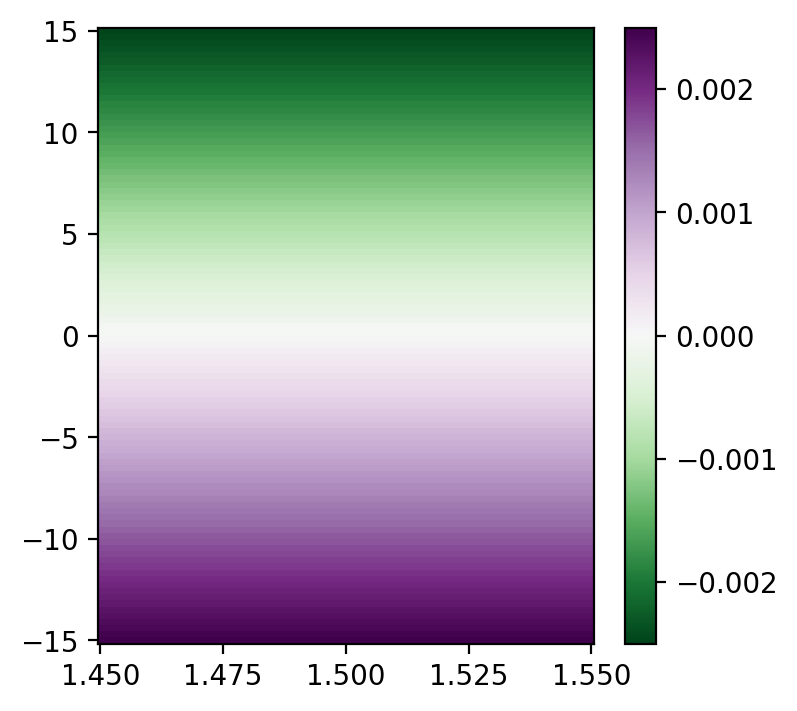

In [6]:
tao.cmd("set var quad[1]|model = -5")
tao.plot_field("Q1")

## Stacked plots

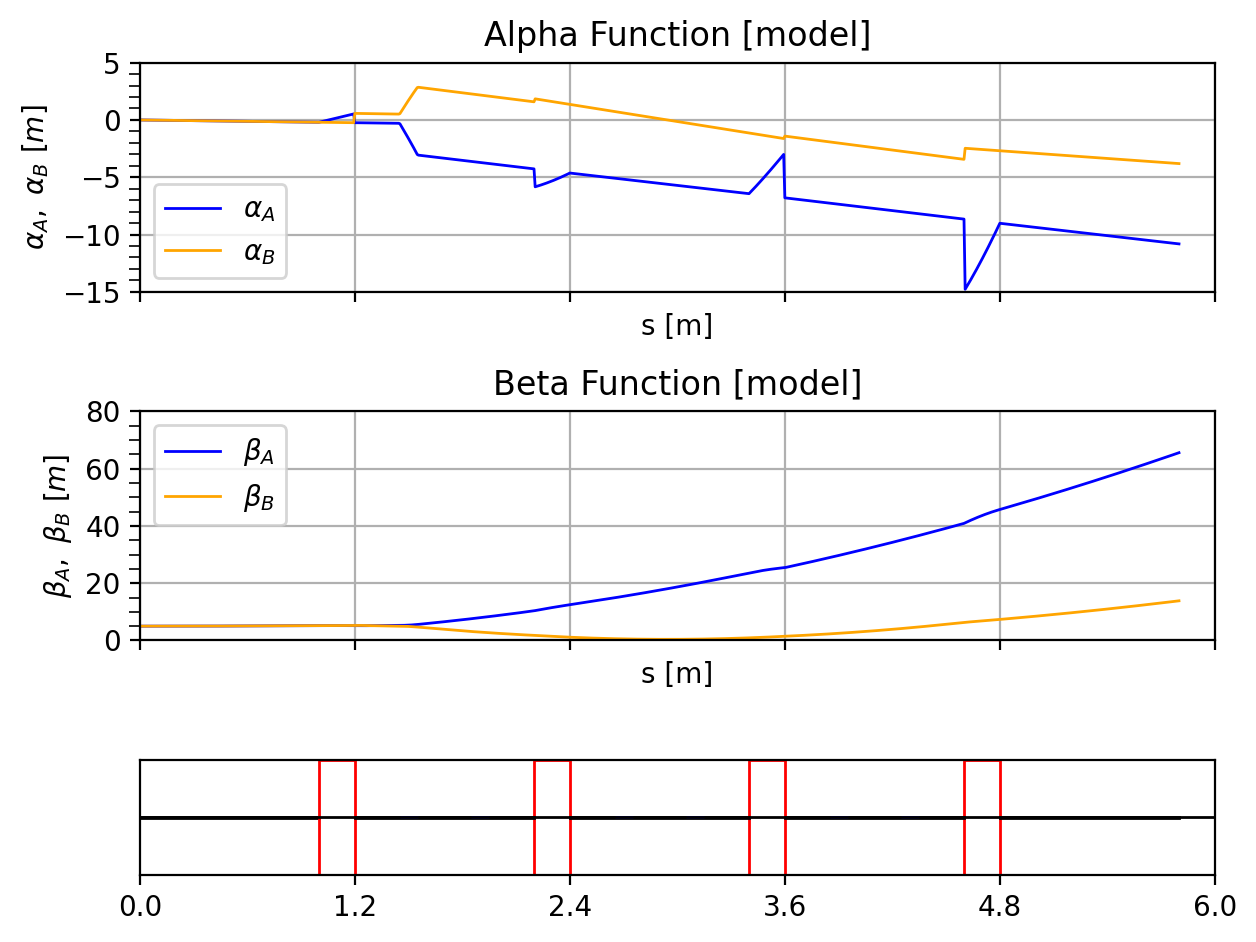

In [7]:
tao.plot(["alpha", "beta"])

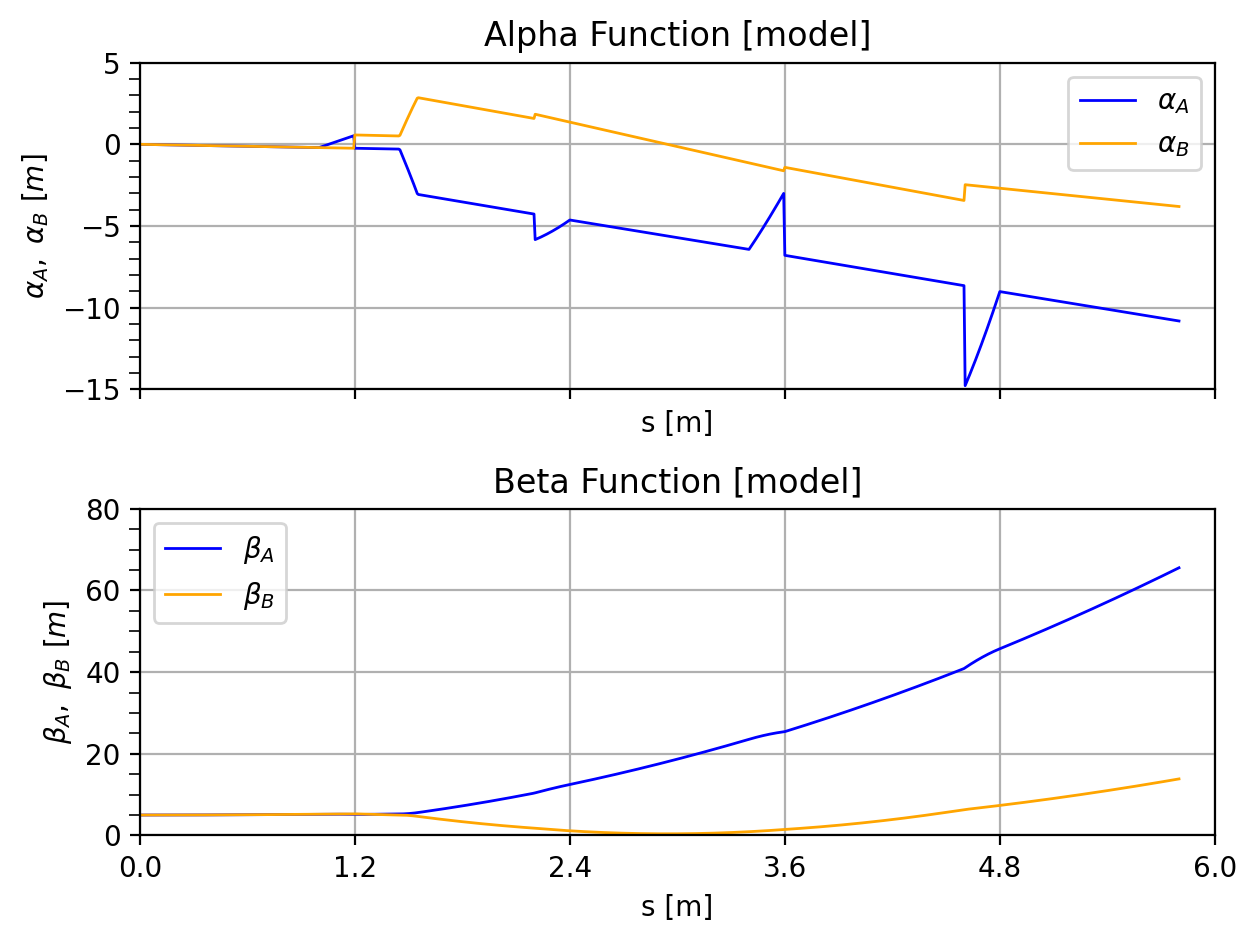

In [8]:
tao.plot(["alpha", "beta"], include_layout=False)

## Gridded plots

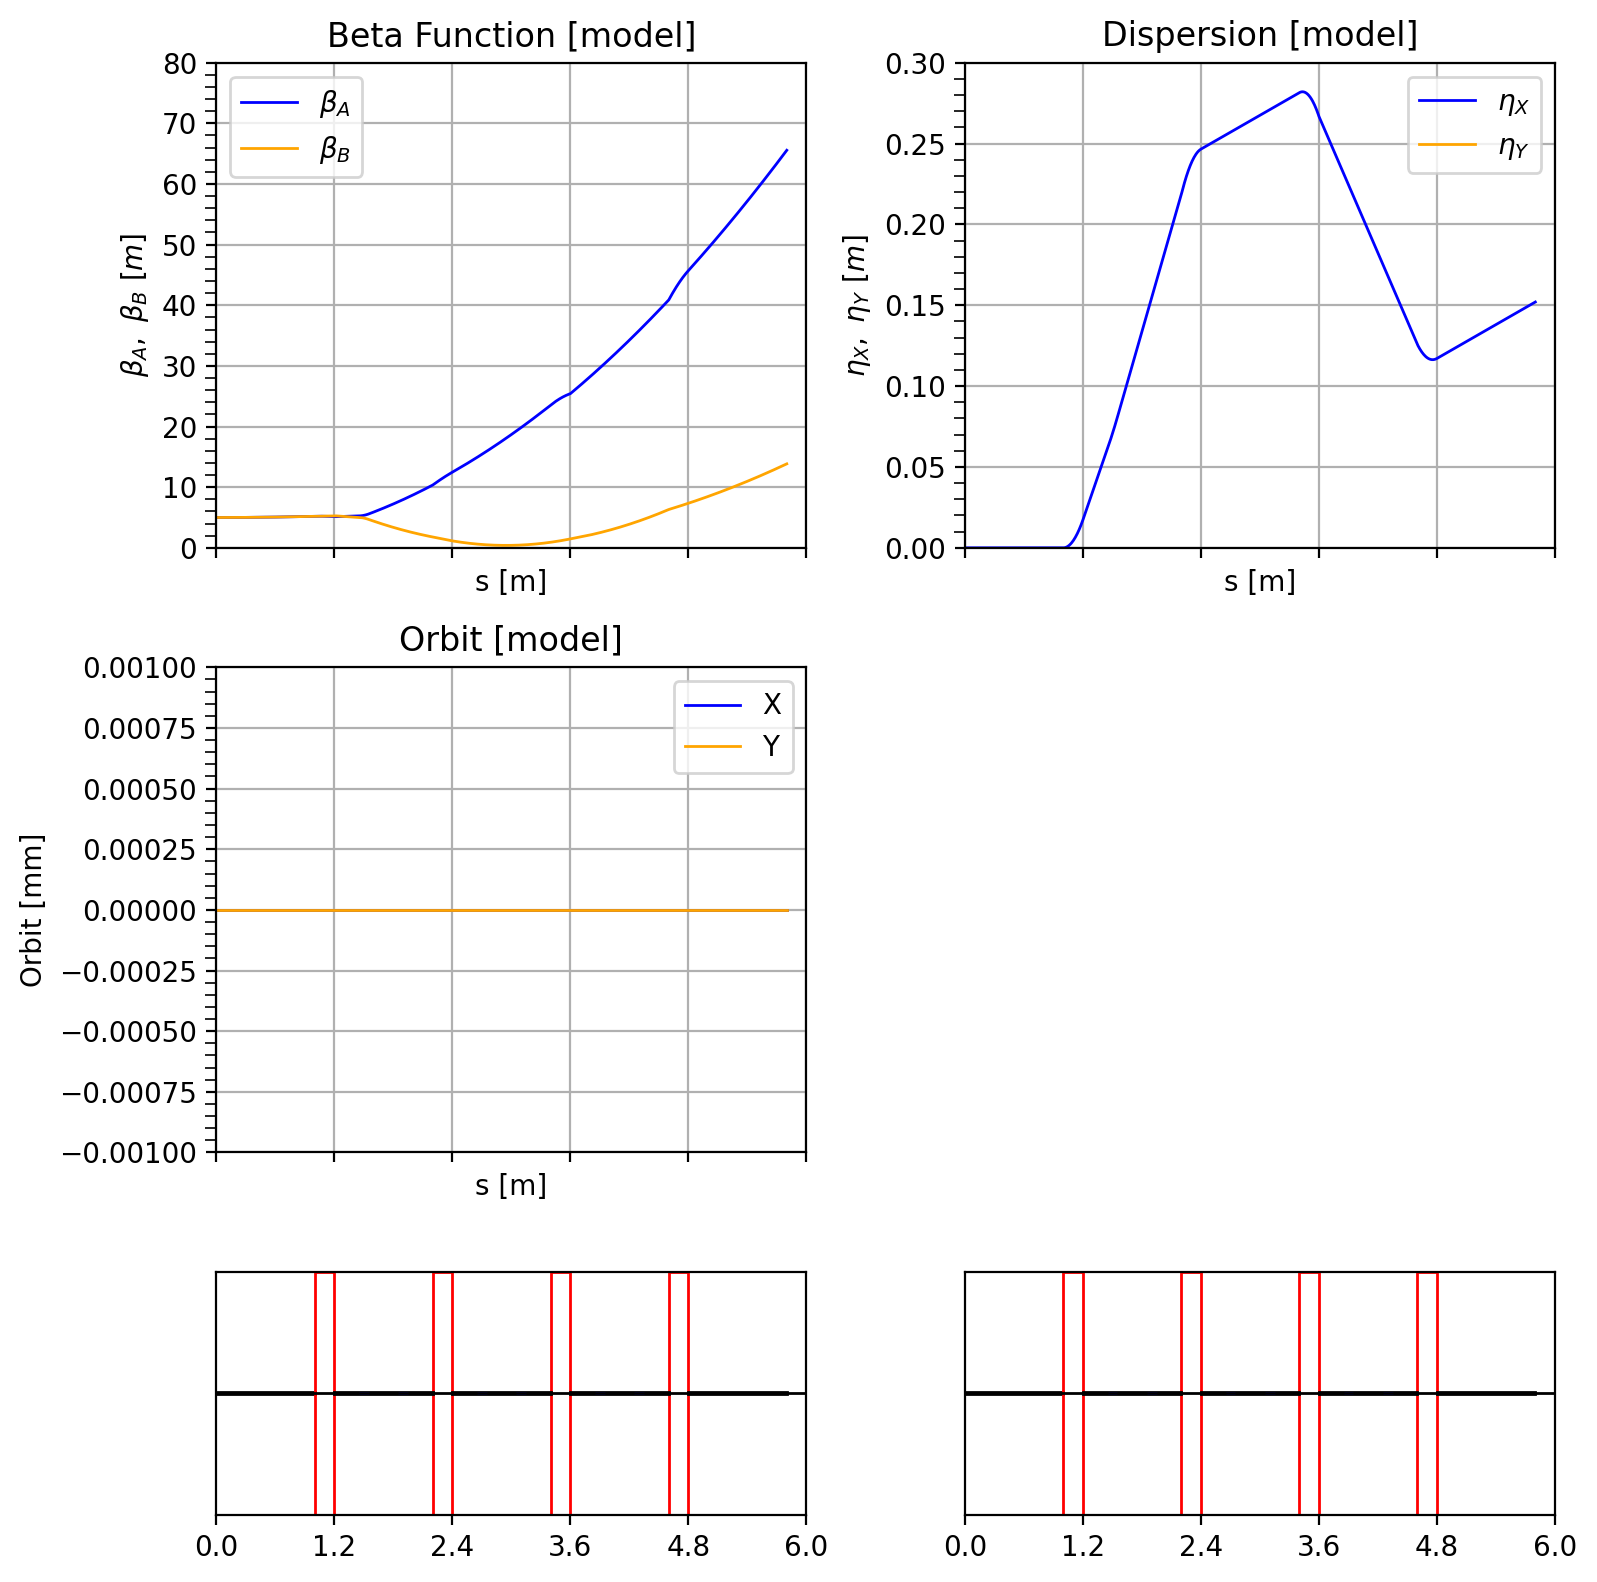

In [9]:
tao.plot(["beta", "dispersion", "orbit"], grid=(2, 2), figsize=(8, 8))

## Saving plots

The parameter `save` makes it convenient to simultaneously display and save the plot to a file.

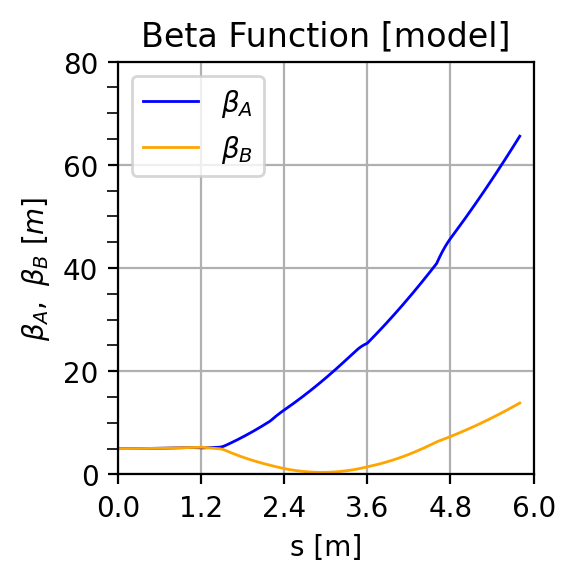

In [10]:
tao.plot("beta", save="beta.png", figsize=(3, 3), include_layout=False)

## Customized plots

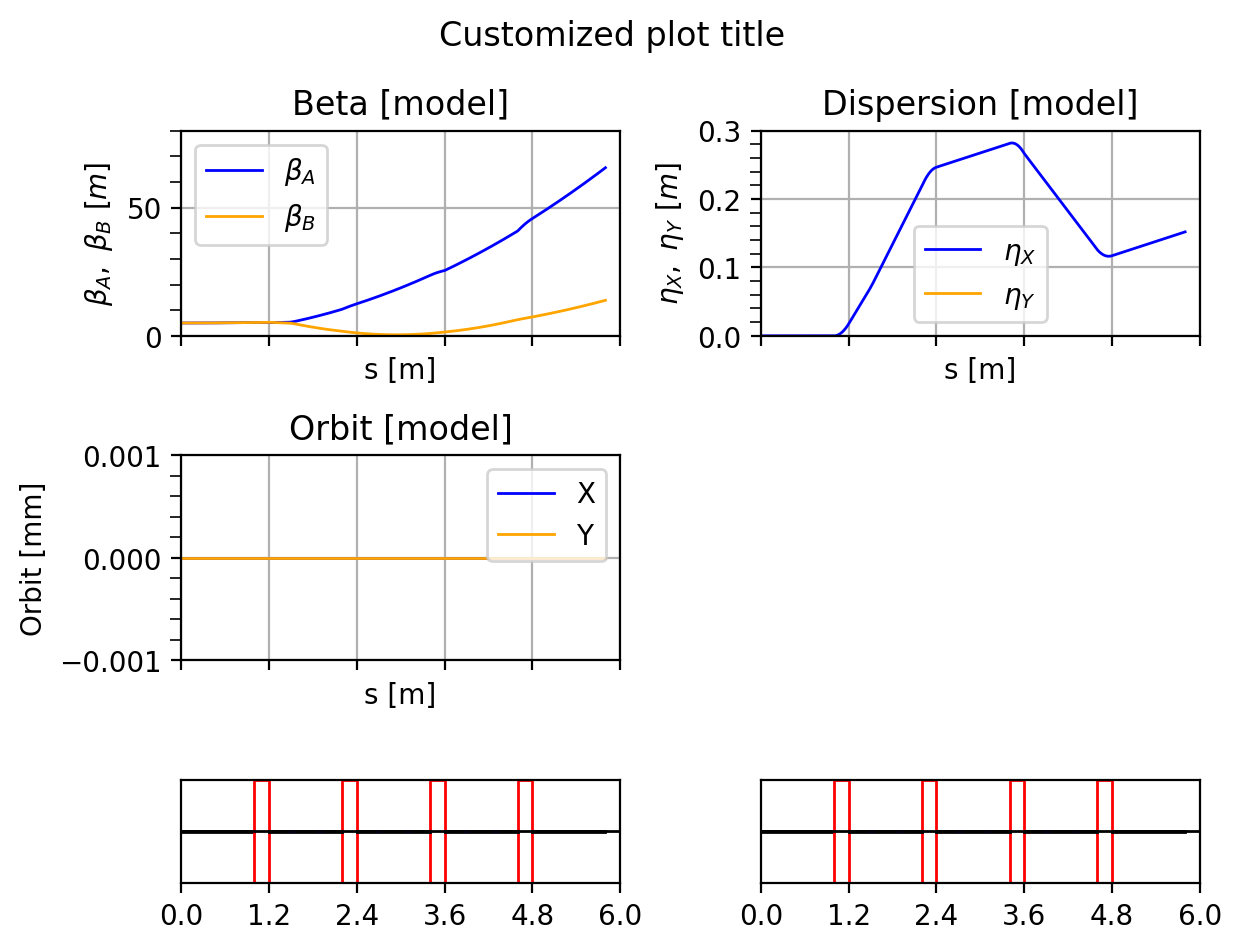

In [11]:
tao.plot(["beta", "dispersion", "orbit"], grid=(2, 2))

# Access the figure by using `plt.gcf()` ("get current figure")
fig = plt.gcf()
fig.suptitle("Customized plot title")

# Access individual Axes objects by indexing `fig.axes`:
fig.axes[0].set_title("Beta [model]")
fig.tight_layout()

## Change defaults

In [12]:
pytao.plotting.mpl.set_defaults(layout_height=0.25)

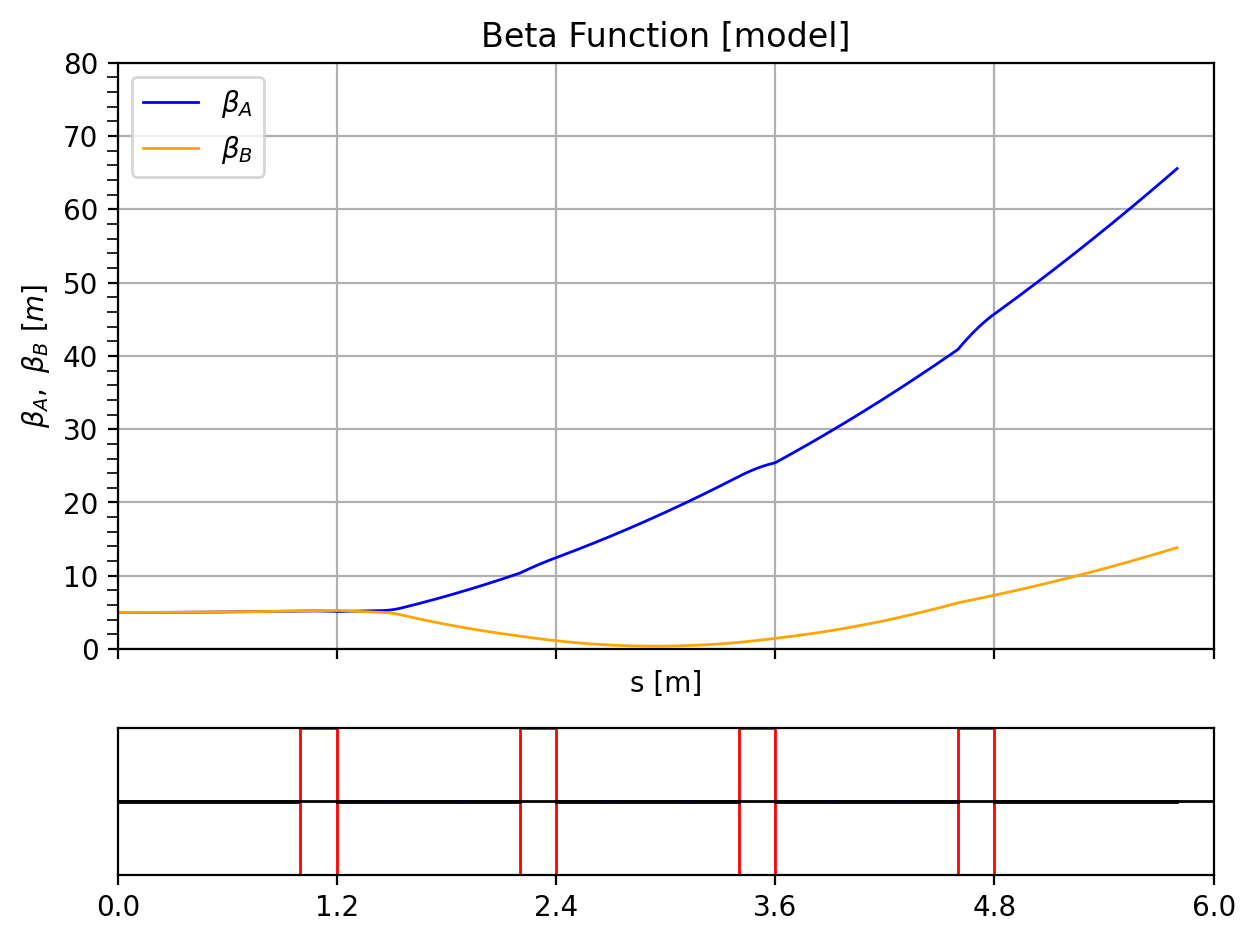

In [13]:
tao.plot("beta")

## Accessing plot data

In [14]:
graphs, beta_fig, beta_ax = tao.last_plot

In [15]:
graphs[0].curves[0].line.xs[:10]

[0.0,
 0.00645161290322581,
 0.0129032258064516,
 0.0193548387096774,
 0.0258064516129032,
 0.032258064516129,
 0.0387096774193548,
 0.0451612903225806,
 0.0516129032258065,
 0.0580645161290323]

## Advanced curve settings

`TaoCurveSettings` may be used to customize per-curve settings in simple or gridded plots.

The below example has 4 plots in a 2x2 grid.

Since each plot has a set of curves, we must specify a dictionary for each plot.

That dictionary contains a mapping of `curve_index` (starting with 1) to a `TaoCurveSettings` instance.

See `TaoCurveSettings` for further information on what may be customized.

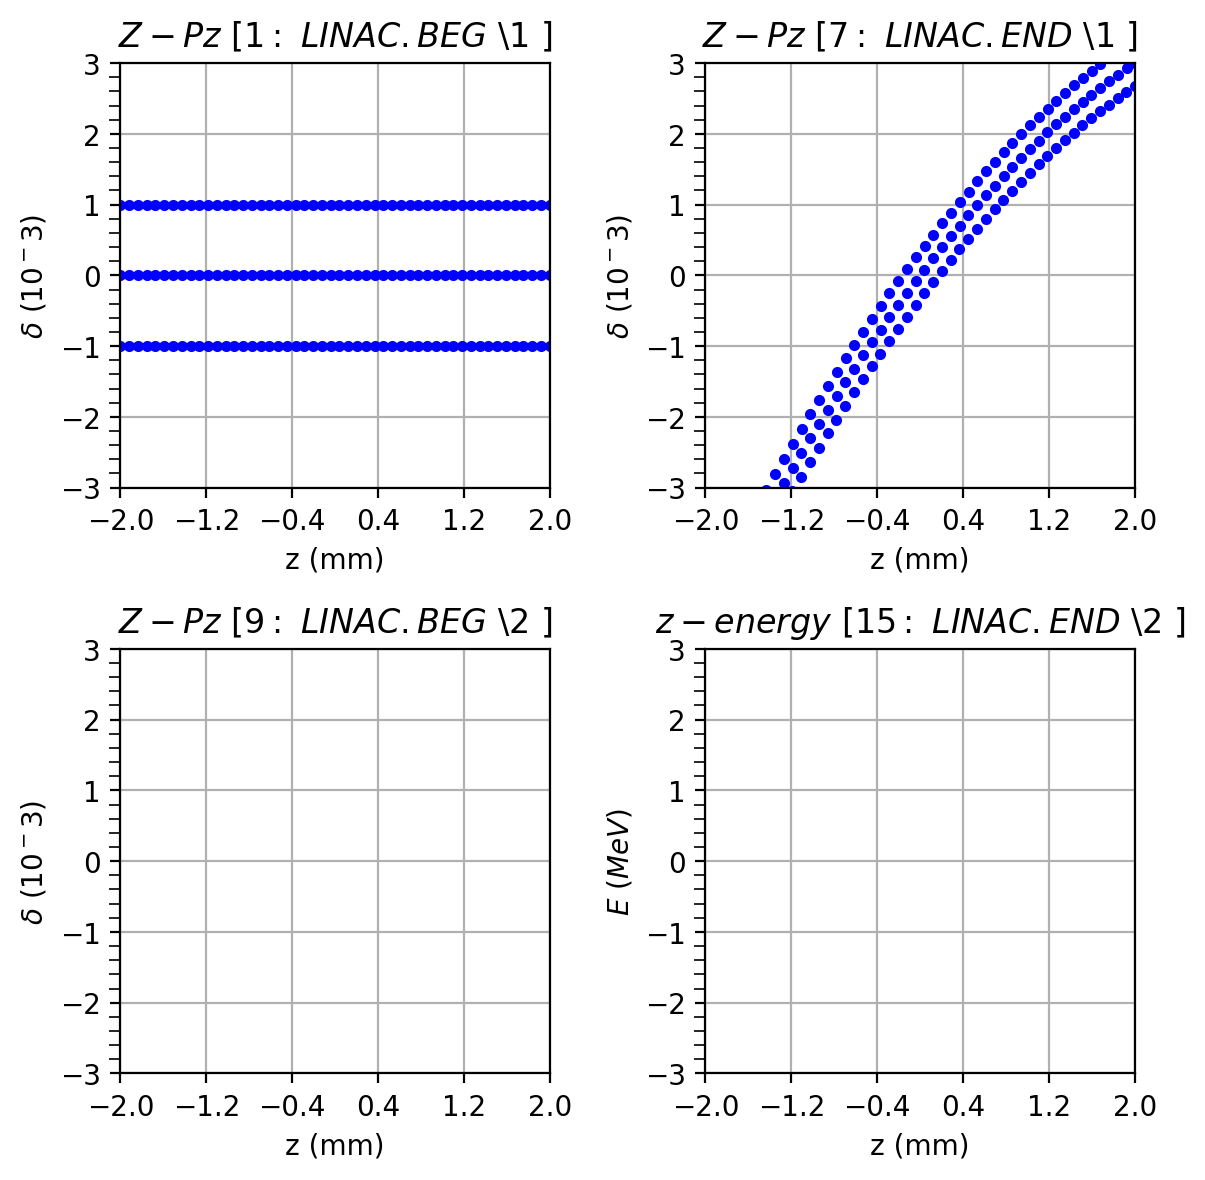

In [16]:
from pytao.plotting.curves import TaoCurveSettings

# Let's use SubprocessTao to make an independent Tao instance in a subprocess.
# Now we can use `tao` from above (`optics_matching`) and `erl` here simultaneously.
erl = pytao.SubprocessTao(init_file="$ACC_ROOT_DIR/bmad-doc/tao_examples/erl/tao.init", plot="mpl")

erl.plot(
    ["zphase", "zphase", "zphase", "zphase2"],
    grid=(2, 2),
    curves=[
        {1: TaoCurveSettings(ele_ref_name=r"linac.beg\1")},
        {1: TaoCurveSettings(ele_ref_name=r"linac.end\1")},
        {1: TaoCurveSettings(ele_ref_name=r"linac.beg\2")},
        {1: TaoCurveSettings(ele_ref_name=r"linac.end\2")},
    ],
    share_x=False,
    include_layout=False,
    figsize=(6, 6),
)